<h1> LABORATORIO 2 </h1>
<h2> Rodrigo Jairo Loaiza Coronado.   ING DE SISTEMAS </h2>
<h2> Bryan Daniel Martinez Cabezas.   CIENCIAS DE LA COMPUTACIÓN</h2>



In [1]:
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
#Importamos los datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# libreria pandas para leer el dataset.
dataset = pd.read_csv('/content/drive/MyDrive/SIS420 Inteligencia Artificial/SegundoSemestre/Dataset/telecom_churn.csv', delimiter=',')

#Imprimimos el dataset.
dataset

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [12]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

#Separamos en X_test los datos, pero dropeando (Y) 'target_class'
X_test = test_dataset.drop(['Churn'], axis=1).values

#Separamos en y_test los datos, pero solo cargando la columna de 'target_class', ya que esa sera nuestra y
y_test = test_dataset['Churn'].values

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'target_class' para y_train
X_train = train_dataset.drop(['Churn'], axis=1).values
y_train = train_dataset['Churn'].values
m_train = len(y_train)


# NORMALIZACION

In [13]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Añadiendo 1 a la columna 0 para para completar los theta


In [16]:
# Normalizar las características de entrenamiento
X_norm, mu, sigma = featureNormalize(X_train)

In [17]:
# Agregar columna de unos para la intersección
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print(X_ready)

[[ 1.         -1.23657149  0.33776137 ...  1.484446    0.90274669
   1.16897685]
 [ 1.         -0.07942878  0.33776137 ... -0.93739139 -0.8899998
  -0.04683848]
 [ 1.         -0.15489461  0.33776137 ...  1.21535296  0.93828572
   0.59682846]
 ...
 [ 1.         -0.78377652  0.33776137 ... -0.87011813 -0.35296561
   0.09619862]
 [ 1.         -2.11700617  0.33776137 ... -0.62548809  0.25119785
  -0.5832276 ]
 [ 1.         -1.41265843  0.33776137 ...  1.25816321  1.04095402
  -0.90506107]]


# **FUNCION SIGMOIDE**

In [18]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [19]:
print(sigmoid(0))

0.5


In [20]:
z = [0, 0.5, 1]
print(sigmoid(z))

[0.5        0.62245933 0.73105858]


# DESCENSO POR EL **GRADIENTE**

# CALCULO DEL **COSTO**

In [21]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [22]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [23]:
#creamos un theta con 11 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 5000 y un alpha 0.009
num_ite = 10000
alpha = 0.003

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")


########################################################################################################
Los valores de theta calculados son:
theta 1: -2.0408891775469136
theta 2: -0.000722918862398198
theta 3: -0.5217575539396042
theta 4: -0.23997455495562672
theta 5: -0.17238482515441197
theta 6: 0.5916037519659632
theta 7: 0.4441801339875496
theta 8: 0.03959677453562269
theta 9: 0.17714242126138985
theta 10: 0.2397392306708586
theta 11: 0.22013230002146514
########################################################################################################
con un costo de: 0.3289048799349165 


Text(0, 0.5, 'Costo J')

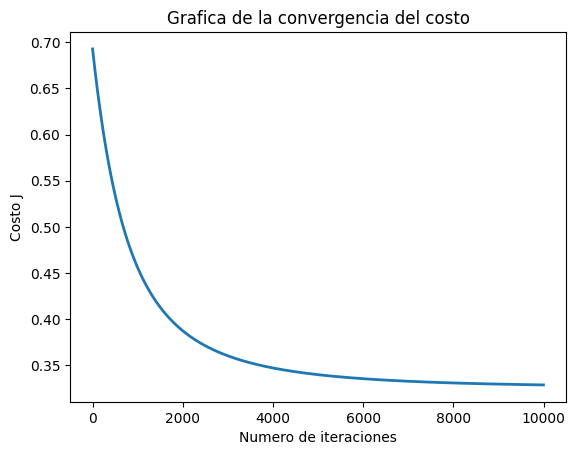

In [24]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [25]:
X_array = [1,128,1,1,2.7,1,265.1,110,89,9.87,10]
X_array_copy = X_array.copy()

# Se normalizan las características para la prueba utilizando mu y sigma calculados anteriormente, excluyendo el primer valor
X_array[1:] = (X_array[1:] - mu) / sigma

# Se calcula el resultado utilizando la función sigmoid y el producto punto entre X_array y theta
resultados = sigmoid(np.dot(X_array, theta))

# Se imprime el resultado
print(f"Un cliente de telecomunicaciones con las caracteristicas: {X_array_copy}")
print(f"Tiene una probabilidad de abandono de la empresa {resultados * 100}%")
print(f"Con valores de theta: {theta}")


Un cliente de telecomunicaciones con las caracteristicas: [1, 128, 1, 1, 2.7, 1, 265.1, 110, 89, 9.87, 10]
Tiene una probabilidad de abandono de la empresa 11.034598418702085%
Con valores de theta: [-2.04088918e+00 -7.22918862e-04 -5.21757554e-01 -2.39974555e-01
 -1.72384825e-01  5.91603752e-01  4.44180134e-01  3.95967745e-02
  1.77142421e-01  2.39739231e-01  2.20132300e-01]


In [26]:
X_array1 = [1,119,1,1,1,5,159.1,200,2,5.6,16]
X_array_copy1 = X_array1.copy()

# Se normalizan las características para la prueba utilizando mu y sigma calculados anteriormente, excluyendo el primer valor
X_array1[1:] = (X_array1[1:] - mu) / sigma

# Se calcula el resultado utilizando la función sigmoid y el producto punto entre X_array y theta
resultados = sigmoid(np.dot(X_array1, theta))

# Se imprime el resultado
print(f"Un cliente de telecomunicaciones con las caracteristicas: {X_array_copy1}")
print(f"Tiene una probabilidad de abandono de la empresa {resultados * 100}%")
print(f"Con valores de theta: {theta}")

Un cliente de telecomunicaciones con las caracteristicas: [1, 119, 1, 1, 1, 5, 159.1, 200, 2, 5.6, 16]
Tiene una probabilidad de abandono de la empresa 16.267458820486745%
Con valores de theta: [-2.04088918e+00 -7.22918862e-04 -5.21757554e-01 -2.39974555e-01
 -1.72384825e-01  5.91603752e-01  4.44180134e-01  3.95967745e-02
  1.77142421e-01  2.39739231e-01  2.20132300e-01]


In [27]:
nombres_columnas = ['AccountWeeks','ContractRenewal','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins','int_n_r','tran_n','tran_n_r','rev_sum','rev_sum_r','major_spend_r','int_cat_n_avg','int_itm_n_avg','ses_mo_avg','ses_mo_sd','ses_ho_avg','ses_ho_sd','ses_wknd_r','ses_len_avg','time_to_int','time_to_tran','target_class','target_class 1/si 0/no'
]

import numpy as np

matriz_datos = np.array([
    [62, 1, 0, 0, 4, 321.1, 105, 78, 13.28, 11.5],
    [117, 1, 0, 0.39, 5, 118.4, 126, 45.9, 12.47, 13.6],
    [159, 1, 0, 0, 1, 169.8, 114, 46, 9.89, 11.6],
    [78, 1, 0, 0.23, 2, 193.4, 99, 45.3, 5.85, 9.3],
    [96, 1, 0, 0.36, 1, 106.6, 128, 46.6, 14.24, 14.9],
    [79, 1, 0, 0, 2, 134.7, 98, 40, 9.49, 11.8],
    [192, 1, 1, 2.67, 2, 156.2, 77, 71.7, 10.78, 9.9],
    [68, 1, 0, 0.34, 3, 231.1, 57, 56.4, 7.67, 9.6],
    [28, 1, 0, 0, 2, 180.8, 109, 56, 14.44, 14.1],
    [184, 0, 0, 0, 2, 213.8, 105, 50, 7.98, 5],
    [74, 1, 1, 3.7, 0, 234.4, 113, 100, 13.3, 13.7]
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si el cliente se queda o se va
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


+----------------+-------------------+-------------+-----------------+-----------+------------+-----------------+--------------+------------+-----------+-----------+------------+
|   AccountWeeks |   ContractRenewal |   DataUsage |   CustServCalls |   DayMins |   DayCalls |   MonthlyCharge |   OverageFee |   RoamMins |   int_n_r |    tran_n |   tran_n_r |
+================+===================+=============+=================+===========+============+=================+==============+============+===========+===========+============+
|             62 |                 1 |           0 |            0    |         4 |      321.1 |             105 |         78   |      13.28 |      11.5 | 0.717177  |          1 |
+----------------+-------------------+-------------+-----------------+-----------+------------+-----------------+--------------+------------+-----------+-----------+------------+
|            117 |                 1 |           0 |            0.39 |         5 |      118.4 |          

In [29]:
# Normalizar el conjunto de prueba
X_norm_test = (X_test - mu) / sigma
m_test = len(X_test)


In [30]:
# Agregar columna de unos al conjunto de prueba normalizado
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)
# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.000  -1.111     0.338     1.627   1.731   0.313   0.254   0.243   1.637     0.595   0.311
   1.000  -0.306     0.338     1.627   1.218  -0.441   0.559   0.644   1.484     0.954  -0.547
   1.000   0.147     0.338     1.627   1.557  -0.441  -1.545  -0.860   0.218    -0.432   0.025
   1.000  -0.130     0.338    -0.615  -0.636   0.313  -1.510  -0.008  -0.809     2.087  -0.941
   1.000  -0.205     0.338     1.627   2.031   0.313  -0.795   0.644   1.014    -0.432   0.811
   1.000  -1.262     0.338    -0.615  -0.636  -0.441   0.335  -2.013  -0.197     0.385  -0.476
   1.000   1.354     0.338     1.627   2.220   0.313   1.189   0.594   2.017    -1.352   1.133
   1.000   2.310     0.338     1.627   1.984  -0.441  -1.032   0.093   0.977     0.030   0.740
   1.000  -0.910     0.338    -0.

In [31]:
# Normaliza el conjunto de prueba usando la media y desviación estándar del conjunto de entrenamiento
X_norm_test, _, _ = featureNormalize(X_test)

# Agrega una columna de unos al conjunto de prueba normalizado
X_test_ready = np.concatenate([np.ones((len(X_norm_test), 1)), X_norm_test], axis=1)

# Realiza predicciones en el conjunto de prueba
y_pred_test = sigmoid(np.dot(X_test_ready, theta))
# Convierte las predicciones a valores binarios (0 o 1) usando un umbral de 0.5
y_pred_test_bin = (y_pred_test >= 0.5).astype(int)

# Calcula la precisión en el conjunto de prueba
precision_test = np.mean(y_pred_test_bin == y_test) * 100

print(f"La precisión en el conjunto de prueba es: {precision_test:.2f}%")

La precisión en el conjunto de prueba es: 85.91%


Calculo de Y predicha


In [32]:
y_predicha = []

# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

# Usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# Imprimir todos los datos de X y las predicciones
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'y_predicha', '(y) usando el umbral'
))
print('-' * 150)

# Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:10d}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], y_predicha[i], y_umbral[i]
    ))



  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7] X[:, 8]   X[:, 9]y_predicha(y) usando el umbral
------------------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -1.091     0.285     1.579   1.658   0.415   0.237   0.167   1.579     0.636     0.119         0
   1.000  -0.292     0.285     1.579   1.155  -0.373   0.531   0.557   1.430     0.993     0.086         0
   1.000   0.157     0.285     1.579   1.488  -0.373  -1.488  -0.906   0.191    -0.386     0.022         0
   1.000  -0.117     0.285    -0.633  -0.663   0.415  -1.454  -0.077  -0.815     2.121     0.102         0
   1.000  -0.192     0.285     1.579   1.952   0.415  -0.768   0.557   0.969    -0.386     0.062         0
   1.000  -1.240     0.285    -0.633  -0.663  -0.373   0.316  -2.028  -0.216     0.427     0.106         0
   1.000   1.355     0.285     1.579   2.138   0.415   1.135   0.509   1.950    -1.301    

In [ ]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 87.26 %


In [33]:
# Calcular la Y predicha para el conjunto de entrenamiento
y_predicha_train = []
for dato in X_ready:
    y_predicha_train.append(sigmoid(np.dot(dato, theta)))

# Convertir la lista de predicciones a un array unidimensional
y_predicha_train = np.array(y_predicha_train)

# Aplicar umbral para convertir las predicciones en valores binarios
y_umbral_train = (y_predicha_train >= 0.5).astype(int)

# Calcular la precisión en el conjunto de entrenamiento
precision_train = np.mean(y_umbral_train == y_train) * 100

# Imprimir las precisiones de los conjuntos de prueba y entrenamiento
print(f"La precisión en el conjunto de prueba es: {precision_test:.2f}%")
print(f"La precisión en el conjunto de entrenamiento es: {precision_train:.2f}%")

La precisión en el conjunto de prueba es: 85.91%
La precisión en el conjunto de entrenamiento es: 86.08%
